In [1]:
# importing libraries


import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import Counter
import datetime as dt


In [2]:
# Task-1: Load metric data

def load_metrics(filename):
    data = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            # created_at,tweet_ID,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category
            data.append((row[0], row[1], row[7], row[8], row[9], row[10], row[11], row[12], row[13]))
    data = np.array(data)
    return data

data = load_metrics('mini_covid_sentiment_metrics.csv')

In [3]:
data

array([['created_at', 'tweet_ID', 'valence_intensity', ...,
        'joy_intensity', 'sentiment_category', 'emotion_category'],
       ['Tue Feb 04 17:04:01 +0000 2020', '1.22474E+18', '0.359', ...,
        '0.218', 'negative', 'fear'],
       ['Tue Feb 04 16:56:58 +0000 2020', '1.22474E+18', '0.589', ...,
        '0.447', 'positive', 'joy'],
       ...,
       ['Tue Feb 11 22:47:46 +0000 2020', '1.22736E+18', '0.526', ...,
        '0.408', 'positive', 'joy'],
       ['Tue Feb 11 22:48:05 +0000 2020', '1.22736E+18', '0.458', ...,
        '0.308', 'negative', 'fear'],
       ['Tue Feb 11 23:01:08 +0000 2020', '1.22737E+18', '0.587', ...,
        '0.432', 'positive', 'joy']], dtype='<U30')

In [4]:
type(data)

numpy.ndarray

In [5]:
# Task-2: Structuring the data

def unstructured_to_structured(data, indexes):
    data = data.tolist()
    data = [tuple(i) for i in data]
    header = data[0]
    del data[0]  # remove header
    custom_datatype = []
    for i in np.arange(9):
        if i in indexes:
            custom_datatype.append((header[i], "<U30"))
        else:
            custom_datatype.append((header[i], "float"))
    return np.array(data, dtype=custom_datatype)

data = unstructured_to_structured(data, [0, 1, 7, 8])

In [6]:
data

array([('Tue Feb 04 17:04:01 +0000 2020', '1.22474E+18', 0.359, 0.477, 0.606, 0.49 , 0.218, 'negative', 'fear'),
       ('Tue Feb 04 16:56:58 +0000 2020', '1.22474E+18', 0.589, 0.344, 0.416, 0.335, 0.447, 'positive', 'joy'),
       ('Tue Feb 04 17:02:35 +0000 2020', '1.22474E+18', 0.527, 0.371, 0.432, 0.322, 0.38 , 'positive', 'joy'),
       ...,
       ('Tue Feb 11 22:47:46 +0000 2020', '1.22736E+18', 0.526, 0.41 , 0.376, 0.328, 0.408, 'positive', 'joy'),
       ('Tue Feb 11 22:48:05 +0000 2020', '1.22736E+18', 0.458, 0.432, 0.469, 0.407, 0.308, 'negative', 'fear'),
       ('Tue Feb 11 23:01:08 +0000 2020', '1.22737E+18', 0.587, 0.332, 0.382, 0.328, 0.432, 'positive', 'joy')],
      dtype=[('created_at', '<U30'), ('tweet_ID', '<U30'), ('valence_intensity', '<f8'), ('anger_intensity', '<f8'), ('fear_intensity', '<f8'), ('sadness_intensity', '<f8'), ('joy_intensity', '<f8'), ('sentiment_category', '<U30'), ('emotion_category', '<U30')])

In [7]:
# Task-3: Converting timestamps into better format


def converting_timestamp(arry):
    x = []
    for i in arry:
        temp = dt.datetime.strptime(i, '%a %b %d %H:%M:%S %z %Y')
        temp = temp.strftime("%Y-%b-%d %H:%M:%S")
        temp = temp.split('-')
        def monthToNum(shortMonth):
            return {
                'jan': '01',
                'feb': '02',
                'mar': '03',
                'apr': '04',
                'may': '05',
                'jun': '06',
                'jul': '07',
                'aug': '08',
                'sep': '09', 
                'oct': '10',
                'nov': '11',
                'dec': '12'
            }[shortMonth]
        temp[1] = monthToNum(temp[1].lower())
        x.append('-'.join(temp))
    return x

data[:]['created_at'] = converting_timestamp(data[:]['created_at'])


In [8]:
data[:]['created_at']

array(['2020-02-04 17:04:01', '2020-02-04 16:56:58',
       '2020-02-04 17:02:35', ..., '2020-02-11 22:47:46',
       '2020-02-11 22:48:05', '2020-02-11 23:01:08'], dtype='<U30')

In [9]:
# Task-4: Replacing nan values

# np.random.seed(33)
dropout = 0.1
intensity = ['valence_intensity', 'anger_intensity', 'fear_intensity',
             'sadness_intensity', 'joy_intensity']

# Uncomment below 4 lines when you reach task 4.
for val in intensity:
    data[:][val][np.random.choice(data[:][val].size, int(dropout * data[:][val].size), replace=False)] = np.nan


def replace_nan(data):
    columns_to_validate = ['valence_intensity', 'anger_intensity', 'fear_intensity', 'sadness_intensity',
                           'joy_intensity']
    for column in columns_to_validate:
        col_mean = np.nanmean(data[:][column])
        print(f'mean for {column} = ', col_mean)
        # Find indices that you need to replace
        inds = np.where(np.isnan(data[:][column]))
        for i in inds:
            data[column][i] = col_mean
    return data

data = replace_nan(data)


mean for valence_intensity =  0.4398337333333333
mean for anger_intensity =  0.44885975555555563
mean for fear_intensity =  0.47252935555555553
mean for sadness_intensity =  0.4183561555555556
mean for joy_intensity =  0.2916627333333333


In [10]:
# Task-5: Box plot data


def boxplot_data(data, output_name="output.png"):
    columns = [data[:]['valence_intensity'], data[:]['anger_intensity'], data[:]['fear_intensity'],
               data[:]['sadness_intensity'], data[:]['joy_intensity']]
    
    # Create a figure instance
    fig = plt.figure(1, figsize=(10, 7))

    # Create an axes instance
    ax = fig.add_subplot(111)

    bp = ax.boxplot(columns, patch_artist=True)
    
    ax.set_xticklabels(['Valence', 'Anger', 'Fear', 'Sadness','Joy'])
    ax.set_title('Distributions Of Sentiment')
    ax.set_ylabel('Values')
    ax.set_xlabel('Sentiment')
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)
    
    # changing color and linewidth of medians
    for median in bp['medians']:
        median.set(color='black',
                   linewidth=1, linestyle='-')
        
    ax.yaxis.grid(True)
    colors = ['green', 'red', 'purple', 'blue','yellow']

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    fig.savefig(output_name, bbox_inches='tight')
    fig.show()
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


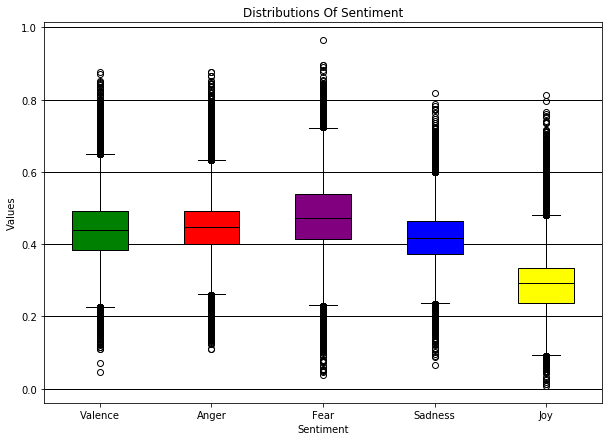

In [11]:
# call to boxplot
    
boxplot_data(data)
    

In [12]:
# Task-6: Counting outliers


def number_of_outliers(sentiment, lower, upper):
    l1 = np.where(sentiment > np.percentile(sentiment, upper))
    l2 = np.where(sentiment < np.percentile(sentiment, lower))
    return len(l1[0]) + len(l2[0])

no_of_outliers_vi = number_of_outliers(data[:]['valence_intensity'], 25, 75)


In [13]:
print(f"Total number of outliers: {no_of_outliers_vi}.")

Total number of outliers: 24858.


In [14]:
# Task-7: NumPy to Pandas


def convert_to_df(data):
    return pd.DataFrame(data=data)

df_metrices = convert_to_df(data)
df_metrices["tweet_ID"] = pd.to_numeric(df_metrices["tweet_ID"])


In [15]:
df_metrices.head()

,created_at,tweet_ID,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category
0,2020-02-04 17:04:01,1.224740e+18,0.359,0.47700,0.606,0.490,0.218000,negative,fear
1,2020-02-04 16:56:58,1.224740e+18,0.589,0.34400,0.416,0.335,0.291663,positive,joy
2,2020-02-04 17:02:35,1.224740e+18,0.527,0.37100,0.432,0.322,0.380000,positive,joy
3,2020-02-04 17:01:09,1.224740e+18,0.418,0.44886,0.536,0.402,0.261000,negative,fear
4,2020-02-04 16:38:13,1.224730e+18,0.321,0.57800,0.543,0.425,0.226000,negative,anger


In [16]:
# Task-8: Load tweets to Pandas


def load_tweets(filename):
    return pd.read_csv(filename, sep='\t')

df_tweets = load_tweets('mini_covid_sentiment_tweets.tsv')


In [17]:
df_tweets.head()

,id,text,screen_name,followers,friends,user_ID,country_region
0,1.231970e+18,Fun fact Men greater risk corona virus Those i...,Mill_1_ionDream,188,565,2.840567e+09,United States
1,1.233260e+18,everyday Corona flow,hecMial,95,452,1.369584e+09,United States
2,1.232900e+18,New post show key shift COVID 19 outbreak WHO ...,remu10,312,222,2.033724e+07,United States
3,1.233760e+18,Its possible get common cold We known COVID 20...,TexasLiberty15,2804,2705,1.206162e+09,United States
4,1.227760e+18,Corona Virus goes 1 3 increasing 15 000 one da...,harleyw,10282,23,1.195464e+07,United States


In [18]:
# Task-9: Joining data


def merge_dataframes(df_metrics, df_tweets):
    df_tweets = df_tweets.rename(columns={'id': 'tweet_ID'})
    df_merged = pd.merge(df_tweets, df_metrices, how='inner', on=['tweet_ID'])
    df_merged.dropna()
    return df_merged

df_merged = merge_dataframes(df_metrices, df_tweets)


In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444437 entries, 0 to 1444436
Data columns (total 15 columns):
tweet_ID              1444437 non-null float64
text                  1443298 non-null object
screen_name           1444437 non-null object
followers             1444437 non-null int64
friends               1444437 non-null int64
user_ID               1444437 non-null float64
country_region        1444437 non-null object
created_at            1444437 non-null object
valence_intensity     1444437 non-null float64
anger_intensity       1444437 non-null float64
fear_intensity        1444437 non-null float64
sadness_intensity     1444437 non-null float64
joy_intensity         1444437 non-null float64
sentiment_category    1444437 non-null object
emotion_category      1444437 non-null object
dtypes: float64(7), int64(2), object(6)
memory usage: 176.3+ MB


In [20]:
df_merged.head()

,tweet_ID,text,screen_name,followers,friends,user_ID,country_region,created_at,valence_intensity,anger_intensity,fear_intensity,sadness_intensity,joy_intensity,sentiment_category,emotion_category
0,1.223350e+18,My talking corona virus corona virus,papitacotuesgay,554,349,169601024.0,United States,2020-01-31 21:09:55,0.439834,0.453,0.625,0.488000,0.277000,negative,fear
1,1.223350e+18,My talking corona virus corona virus,papitacotuesgay,554,349,169601024.0,United States,2020-01-31 21:13:21,0.450000,0.429,0.551,0.418000,0.291663,negative,fear
2,1.223350e+18,My talking corona virus corona virus,papitacotuesgay,554,349,169601024.0,United States,2020-01-31 21:17:59,0.462000,0.471,0.608,0.418356,0.260000,negative,fear
3,1.223350e+18,My talking corona virus corona virus,papitacotuesgay,554,349,169601024.0,United States,2020-01-31 21:03:16,0.371000,0.478,0.711,0.520000,0.171000,negative,fear
4,1.223350e+18,My talking corona virus corona virus,papitacotuesgay,554,349,169601024.0,United States,2020-01-31 21:06:48,0.440000,0.463,0.511,0.404000,0.271000,negative,fear


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


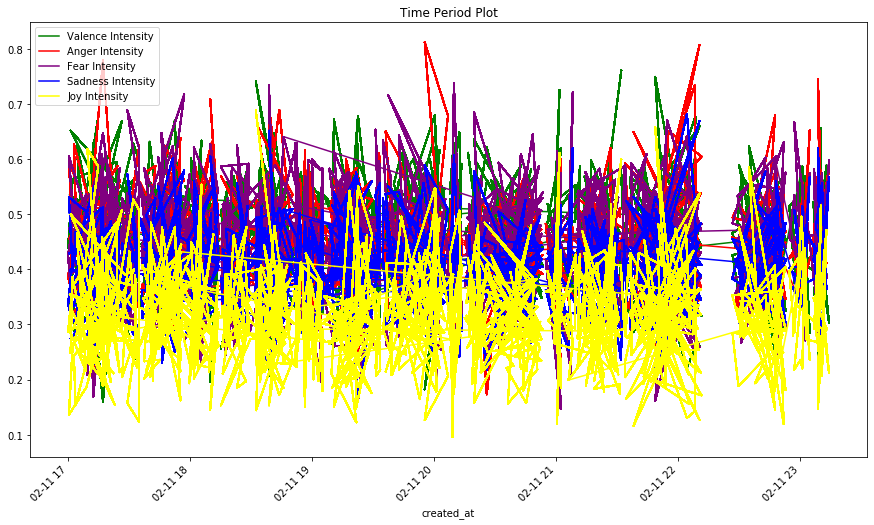

In [21]:
# Task-10: Plotting timeperiod

def plot_timeperiod(df_merged, from_date, to_date, output_name='output.png'):
    df_merged['created_at'] = pd.to_datetime(df_merged['created_at'])
    interval_data = (df_merged['created_at'] > pd.to_datetime(from_date)) & (df_merged['created_at'] < pd.to_datetime(to_date))
    df_new = df_merged.loc[interval_data]
    plt.figure(figsize = (15,8))
    plt.plot(df_new['created_at'], df_new['valence_intensity'], label="Valence Intensity", color='green')
    plt.plot(df_new['created_at'], df_new['anger_intensity'], label="Anger Intensity", color='red')
    plt.plot(df_new['created_at'], df_new['fear_intensity'], label="Fear Intensity", color='purple')
    plt.plot(df_new['created_at'], df_new['sadness_intensity'], label="Sadness Intensity", color='blue')
    plt.plot(df_new['created_at'], df_new['joy_intensity'], label="Joy Intensity", color='yellow')
    plt.title("Time Period Plot")
    plt.xlabel('created_at')
    plt.legend(loc="upper left")
    plt.xticks(rotation=45, ha='right')
    plt.savefig(output_name, bbox_inches='tight')
    plt.show()
    
plot_timeperiod(df_merged, '2020-02-11 17:00:00', '2020-02-12 17:00:00')

In [22]:
def get_top_n_words(column, n):
    """retrieves the top n words and their frequencies from given data"""
    
    return df_merged['text'].str.lower().str.split(expand=True).stack().value_counts()[:n]

word_frequency = get_top_n_words(df_merged['text'], 50)

In [23]:
word_frequency

corona       1113912
virus         801976
i             457805
2019          188655
the           173725
china         140095
people        133963
like          109906
get           106093
flu            83658
it             71629
“              69296
new            68904
this           65121
us             64825
one            61501
got            53856
health         53840
novel          53296
know           52954
2              50454
outbreak       48608
time           47373
think          45839
spread         45219
you            43695
1              42512
world          41299
we             40929
if             40598
going          40396
disease        39228
a              38779
”              38440
would          38158
good           38156
beer           37451
see            36917
news           36478
via            34663
who            34370
so             34285
first          33410
confirmed      33182
really         32967
..             32718
case           32336
go           

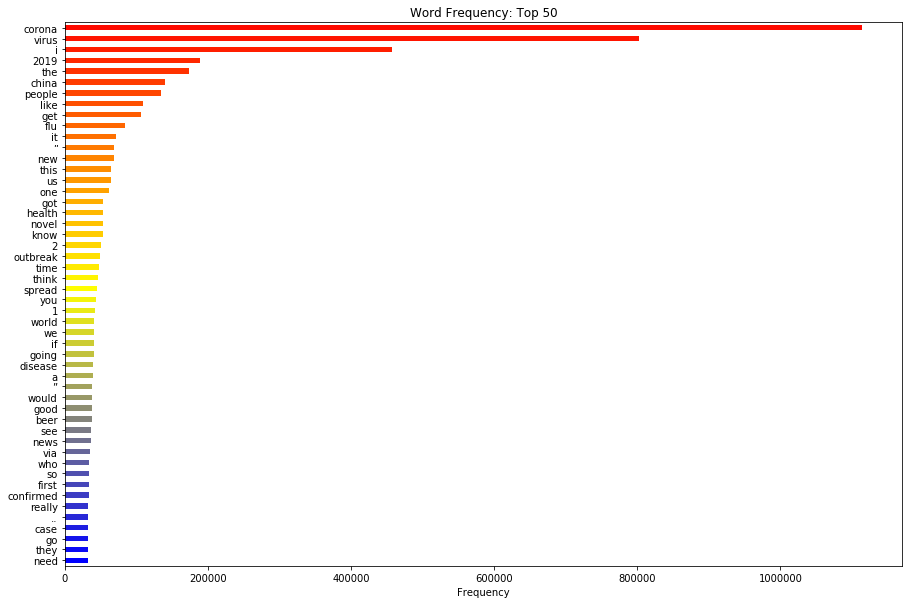

In [24]:
# Task-11: Analysis: Word Ranking

def plot_frequency(word_frequency, n, output_name='output.png'):
    # set up color spectrum
    colors = ["blue", "yellow", "red"]
    clist = [(0, "blue"), (0.5, "yellow"), (1, "red")]
    fig = plt.figure(1, figsize=(10, 7))
    
    rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
    nlist = np.arange(n).astype(float)
    
    word_frequency[::-1].plot(kind = 'barh',figsize = (15, 10), color=rvb(nlist/n))
    plt.xlabel('Frequency')
    plt.title(f'Word Frequency: Top {n}')
    plt.show()
    fig.savefig(output_name, bbox_inches='tight')

plot_frequency(word_frequency, 50)